## figures and stats for Enhancer/Promoter manuscript

<a id='Contents'></a>
### Contents

- [relROC heatmap](#relROC)
- [K-mer PCA](#pca)
- [CpG/GC analysis](#gc)
- [TF motif counts](#tfcounts)
- [Tomtom plots](#tomtom)
- [TF Motif Length Corr.](#tfLength)
- [Weights for Enh/Prom Classifiers](#weights)

### load libraries, etc

In [1]:
#load libraries
library(dplyr)
library(ggplot2)
library(readr)
library(stringr)
#library("ggbiplot") ##requires R3.3
#library("ggsci")
#library("factoextra")
#library("ppcor")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



<a id='relROC'></a>
### heat chart for relative ROC AUCs (Fig 3)

In [ ]:
roc <- read.table("prom_enh_rel_ROC.txt",header=TRUE,stringsAsFactors = FALSE)
for (i in 1:nrow(roc)) {
  if (roc$neg_set[i] == "gc") {roc$neg_set[i] <- "2GC-Matched"}
  if (roc$neg_set[i] == "narr") {roc$neg_set[i] <- "1Narrow"}
  if (roc$neg_set[i] == "neg") {roc$neg_set[i] <- "3Negatives"}
  if (roc$set[i] == "all") {roc$set[i] <- "All"}
  if (roc$set[i] == "cgi") {roc$set[i] <- "CGI"}
  if (roc$set[i] == "noncgi") {roc$set[i] <- "Non-CGI"}
}
ggplot(roc[roc$predicted == "enhancer",],aes(x=set,y=neg_set)) + geom_tile(aes(fill=rel),colour = "white") +
  scale_fill_gradient2(limits=c(0.5,1.5),midpoint=1,high="red3",low="blue3") + theme_bw(base_size = 24)+
  labs(x="Positive Set",y="Negative Set") + geom_text(aes(label=round(rel,digits=2)),size=14)+
  theme(axis.title.y = element_text(),axis.title.x = element_text(),plot.title = element_text(),legend.position="none")

***
[Contents](#Contents)

<a id='pca'></a>
### K-mer PCA

In [ ]:
# all enhancers/promoters together on same plot
# relevant files can be obtained by running kmer_count.py to get all 6-mers from fasta files of the all_fantom*.bed files (expanded to 600bp)
all_enh <- read_delim(all_enh_file,"\t", escape_double = FALSE, trim_ws = TRUE)
all_prom <- read_delim(all_prom_file,"\t", escape_double = FALSE, trim_ws = TRUE)

all_enh$spec <- "Enhancer"
all_prom$spec <- "Promoter"
all_spec <- merge(all_enh,all_prom,all=T)[,4100]
log_all <- log(merge(all_enh,all_prom,all = T)[,4:4099]+1)
enh_pca <- prcomp(log(all_enh[,4:4099]+1),scale. = T, center = T)
ggbiplot(enh_pca, obs.scale = 1, var.scale = 1,ellipse = T, var.axes = F,alpha = 0.5)
prom_pca <- prcomp(log(all_prom[,4:4099]+1),scale. = T, center = T)
ggbiplot(prom_pca, obs.scale = 1, var.scale = 1,ellipse = T, var.axes = F,alpha = 0.5)

all_pca <- prcomp(log_all,scale. = T, center = T)
ggbiplot(all_pca,obs.scale = 1, var.scale = 1,groups = all_spec,ellipse = T, var.axes = F,alpha = 0.5) +
  scale_color_manual(values=c("seagreen","violetred4"))+
  theme(legend.direction = 'horizontal',legend.position = 'top',text = element_text(size=14),axis.title.x= element_text(size = 18),axis.title.y=element_text(size = 18))+
  scale_y_reverse()

In [ ]:
all_var <- data.frame(pc1 = get_pca_var(all_pca)$coord[,1],pc2 = get_pca_var(all_pca)$coord[,2],GC = sixmers$GC,CpG = sixmers$CpG)
cor.test(all_var$pc1,all_var$GC,method="spearman")
spcor(all_var[c(1,3,4)],method="spearman")
cor.test(all_var$pc2,all_var$GC,method="spearman")
spcor(all_var[c(2,3,4)],method="spearman")

In [ ]:
# relevant files can be obtained by running kmer_count.py to get all 6-mers from fasta files of the all_fantom_enhancers.bed file expanded to 600,
# then filtering for broad and narrow regions as described in the readme
all_enh_b <- read_delim(all_enh_broad,"\t", escape_double = FALSE, trim_ws = TRUE)
all_enh_n <- read_delim(all_enh_narrow,"\t", escape_double = FALSE, trim_ws = TRUE)

# plot enhancers/promoters individually: have to alter indices if not doing all 6-mers
all_enh_b$spec <- "Broad"
all_enh_n$spec <- "Narrow"
all_enh_spec <- merge(all_enh_b,all_enh_n,all=T)[,4100]
log_all_enh <- log(merge(all_enh_b,all_enh_n,all = T)[,4:4099]+1)

all_enh_pca <- prcomp(log_all_enh,scale. = T, center = T)
ggbiplot(all_enh_pca,obs.scale = 1, var.scale = 1,groups = all_enh_spec,ellipse = T, var.axes = F) +
  scale_color_manual(values=c("black","coral4"))+  
  theme(legend.direction = 'horizontal',legend.position = 'top',text = element_text(size=14),axis.title.x= element_text(size = 18),axis.title.y=element_text(size = 18)) +
  scale_y_reverse()

In [ ]:
all_enh_var <- data.frame(pc1 = get_pca_var(all_enh_pca)$coord[,1],pc2 = get_pca_var(all_enh_pca)$coord[,2],GC = sixmers$GC,CpG = sixmers$CpG)
cor.test(all_enh_var$pc1,all_enh_var$GC,method="spearman")
spcor(all_enh_var[c(1,3,4)],method="spearman")
cor.test(all_enh_var$pc2,all_enh_var$GC,method="spearman")
spcor(all_enh_var[c(2,3,4)],method="spearman")

In [ ]:
# relevant files can be obtained by running kmer_count.py to get all 6-mers from fasta files of the all_fantom_prom.bed file expanded to 600,
# then filtering for broad and narrow regions as described in the readme
all_prom_b <- read_delim(all_prom_broad,"\t", escape_double = FALSE, trim_ws = TRUE)
all_prom_n <- read_delim(all_prom_narrow,"\t", escape_double = FALSE, trim_ws = TRUE)
all_prom_b$spec <- "Broad"
all_prom_n$spec <- "Narrow"
all_prom_spec <- merge(all_prom_b,all_prom_n,all=T)[,4100]
log_all_prom <- log(merge(all_prom_b,all_prom_n,all = T)[,4:4099]+1)

all_prom_pca <- prcomp(log_all_prom,scale. = T, center = T)
ggbiplot(all_prom_pca,obs.scale = 1, var.scale = 1,groups = all_prom_spec,ellipse = T, var.axes = F) +
  scale_color_manual(values=c("black","coral4"))+  
  theme(legend.direction = 'horizontal',legend.position = 'top',text = element_text(size=14),axis.title.x= element_text(size = 18),axis.title.y=element_text(size = 18))

In [ ]:
# enhancers/promoters on same plot, split by broad/narrow
all_spec <- merge(merge(merge(all_enh_b,all_enh_n,all=T),all_prom_b,all=T),all_prom_n,all=T)[,4100] 
log_all <- log(merge(merge(merge(all_enh_b,all_enh_n,all=T),all_prom_b,all=T),all_prom_n,all=T)[,4:4099]+1)
all_pca <- prcomp(log_all, scale. = T,center = T)
ggbiplot(all_pca,obs.scale = 1, var.scale = 1,groups = all_spec,ellipse = T, var.axes = F) +
  scale_color_manual(values=c("purple4","blue4"))+  
  theme(legend.direction = 'horizontal',legend.position = 'top',text = element_text(size=14),axis.title.x= element_text(size = 18),axis.title.y=element_text(size = 18))

In [ ]:
# enhancers, split by activity and CGI status
cgi_enh_b <- read_delim(cgi_enh_broad,"\t", escape_double = FALSE, trim_ws = TRUE)
cgi_enh_n <- read_delim(cgi_enh_narr,"\t", escape_double = FALSE, trim_ws = TRUE)
noncgi_enh_b <- read_delim(noncgi_enh_broad,"\t", escape_double = FALSE, trim_ws = TRUE)
noncgi_enh_n <- read_delim(noncgi_enh_narr,"\t", escape_double = FALSE, trim_ws = TRUE)
cgi_enh_b$spec <- "cgi_enh_broad"
cgi_enh_n$spec <- "cgi_enh_narrow"
noncgi_enh_n$spec <- "noncgi_enh_narrow"
noncgi_enh_b$spec <- "noncgi_enh_broad"

all_enh_spec <- merge(merge(merge(cgi_enh_b,cgi_enh_n,all=T),noncgi_enh_b,all=T),noncgi_enh_n,all=T)[,4100]
log_all_enh <- log(merge(merge(merge(cgi_enh_b,cgi_enh_n,all=T),noncgi_enh_b,all=T),noncgi_enh_n,all=T)[,4:4099]+1)
all_enh_pca <- prcomp(log_all_enh,scale. = T, center = T)
ggbiplot(all_enh_pca,obs.scale = 1, var.scale = 1,groups = all_enh_spec,ellipse = T, var.axes = F)+ 
  scale_color_manual(values=c("darkgreen","darkolivegreen3","royalblue4","cadetblue2"))+  
  theme(legend.direction = 'horizontal',legend.position = 'top',text = element_text(size=14),axis.title.x= element_text(size = 18),axis.title.y=element_text(size = 18))

In [ ]:
all_enh_var <- data.frame(pc1 = get_pca_var(all_enh_pca)$coord[,1],pc2 = get_pca_var(all_enh_pca)$coord[,2],GC = sixmers$GC,CpG = sixmers$CpG)
cor.test(all_enh_var$pc1,all_enh_var$GC,method="spearman")
spcor(all_enh_var[c(1,3,4)],method="spearman")
cor.test(all_enh_var$pc2,all_enh_var$GC,method="spearman")
spcor(all_enh_var[c(2,3,4)],method="spearman")

In [ ]:
# promoters, split by activity and CGI status
cgi_prom_b <- read_delim(cgi_prom_broad,"\t", escape_double = FALSE, trim_ws = TRUE)
cgi_prom_n <- read_delim(cgi_prom_narr,"\t", escape_double = FALSE, trim_ws = TRUE)
noncgi_prom_b <- read_delim(noncgi_prom_broad,"\t", escape_double = FALSE, trim_ws = TRUE)
noncgi_prom_n <- read_delim(noncgi_prom_narr,"\t", escape_double = FALSE, trim_ws = TRUE)
cgi_prom_b$spec <- "cgi_prom_broad"
cgi_prom_n$spec <- "cgi_prom_narrow"
noncgi_prom_n$spec <- "noncgi_prom_narrow"
noncgi_prom_b$spec <- "noncgi_prom_broad"

all_prom_spec <- merge(merge(merge(cgi_prom_b,cgi_prom_n,all=T),noncgi_prom_b,all=T),noncgi_prom_n,all=T)[,4100]
log_all_prom <- log(merge(merge(merge(cgi_prom_b,cgi_prom_n,all=T),noncgi_prom_b,all=T),noncgi_prom_n,all=T)[,4:4099]+1)
all_prom_pca <- prcomp(log_all_prom,scale. = T, center = T)
ggbiplot(all_prom_pca,obs.scale = 1, var.scale = 1,groups = all_prom_spec,ellipse = T, var.axes = F)+ 
  scale_color_manual(values=c("purple4","mediumpurple","red4","indianred3"))+  
  theme(legend.direction = 'horizontal',legend.position = 'top',text = element_text(size=14),axis.title.x= element_text(size = 18),axis.title.y=element_text(size = 18))

In [ ]:
all_prom_var <- data.frame(pc1 = get_pca_var(all_prom_pca)$coord[,1],pc2 = get_pca_var(all_prom_pca)$coord[,2],GC = sixmers$GC,CpG = sixmers$CpG)
cor.test(all_prom_var$pc1,all_prom_var$GC,method="spearman")
spcor(all_prom_var[c(1,3,4)],method="spearman")
cor.test(all_prom_var$pc2,all_prom_var$GC,method="spearman")
spcor(all_prom_var[c(2,3,4)],method="spearman")

In [ ]:
# enhancers/promoters, same plot, split by activity and CGI status
all_spec <- c(all_enh_spec,all_prom_spec)
log_all <- merge(log_all_enh,log_all_prom,all=T)
all_pca <- prcomp(log_all,scale. = T, center = T)
ggbiplot(all_pca,obs.scale = 1, var.scale = 1,groups = all_spec,ellipse = T, var.axes = F)+ 
  scale_color_manual(values=c("darkgreen","darkolivegreen3","purple4","mediumpurple","royalblue4","cadetblue2","red4","indianred3"))+ 
  theme(legend.direction = 'horizontal',legend.position = 'top',text = element_text(size=14),axis.title.x= element_text(size = 18),axis.title.y=element_text(size = 18))

In [ ]:
all_var <- data.frame(pc1 = get_pca_var(all_pca)$coord[,1],pc2 = get_pca_var(all_pca)$coord[,2],GC = sixmers$GC,CpG = sixmers$CpG)
cor.test(all_var$pc1,all_var$GC,method="spearman")
spcor(all_var[c(1,3,4)],method="spearman")
cor.test(all_var$pc2,all_var$GC,method="spearman")
spcor(all_var[c(2,3,4)],method="spearman")

***
[Contents](#Contents)

<a id='gc'></a>
### CpG/GC analyses

In [ ]:
# check for relevant files in classifiers/cgi_analyses/weights/
#cgi_enh <- read.table(cgi_enh_kmer_file,header=TRUE,stringsAsFactors = FALSE)
#cgi_prom <- read.table(cgi_prom_kmer_file,header=TRUE,stringsAsFactors = FALSE)
#noncgi_prom <- read.table(noncgi_prom_kmer_file,header=TRUE,stringsAsFactors = FALSE)
#noncgi_enh <- read.table(noncgi_enh_kmer_file,header=TRUE,stringsAsFactors = FALSE)
cgi_enh$GC <- 0.0
cgi_enh$CpG <- 0.0
cgi_prom$GC <- 0.0
cgi_prom$CpG <- 0.0
noncgi_prom$GC <- 0.0
noncgi_prom$CpG <- 0.0
noncgi_enh$GC <- 0.0
noncgi_enh$CpG <- 0.0
for (seq in 1:nrow(enhancer_pos)) {
    cgi_enh$GC[seq] <- str_count(cgi_enh$kmer[seq], "G")+ str_count(cgi_enh$kmer[seq], "C")
    cgi_enh$CpG[seq] <- str_count(cgi_enh$kmer[seq], "CG")
    cgi_prom$GC[seq] <- str_count(cgi_prom$kmer[seq], "G")+ str_count(cgi_prom$kmer[seq], "C")
    cgi_prom$CpG[seq] <- str_count(cgi_prom$kmer[seq], "CG")
    noncgi_prom$GC[seq] <- str_count(noncgi_prom$kmer[seq], "G")+ str_count(noncgi_prom$kmer[seq], "C")
    noncgi_prom$CpG[seq] <- str_count(noncgi_prom$kmer[seq], "CG")
    noncgi_enh$GC[seq] <- str_count(noncgi_enh$kmer[seq], "G")+ str_count(noncgi_enh$kmer[seq], "C")
    noncgi_enh$CpG[seq] <- str_count(noncgi_enh$kmer[seq], "CG")
}

#### violin plot for kmer weights/ gc content/ cpg count (supplement)

In [ ]:
# current example is for cgi enhancer ones, can be replaced with any of the others, swapping for relevant colour vector
enh_cols <- c("skyblue2","skyblue4","dodgerblue4")
prom_cols <- c("palegreen3","olivedrab","darkgreen")
cgi_enh$CpG <- as.factor(cgi_enh$CpG)
cgi_enh$GC <- as.factor(cgi_enh$GC)
line_plot <- data.frame(x = as.factor(unique(cgi_enh$GC)))
line_plot$CpG <- as.factor(0)
for (i in 1:nrow(line_plot)) {
  line_plot$y[i] <- mean(cgi_enh[cgi_enh$GC == line_plot$x[i],]$narr_w)}
ggplot(cgi_enh,aes(x=GC,y=narr_w,fill=CpG)) + geom_violin(color="darkgrey",scale = "width") +
  geom_hline(yintercept=0,color = "black") + scale_fill_manual(values=prom_cols) + theme_classic() +
  labs(x="GC Content (Proportion)",y="Weight",title = "Broad/Narrow (CGI)") +
  theme(text = element_text(size=18),axis.text.x = element_text(face = "bold"),axis.text.y = element_text(face = "bold")) +
  ylim(-40,40) + geom_line(data = line_plot, aes(x= x, y = y,group=1),color="red") + geom_point(data = line_plot, aes(x= x, y = y,group=1),color="red")

#### variance plotting- numbers are squared semipartial correlations (Fig 5)

In [ ]:
smc <- data.frame(Neg_SMC = c(summary(lm(cgi_prom$neg_mean ~ cgi_prom$CpG))$r.squared,summary(lm(cgi_prom$neg_mean ~ cgi_prom$GC + cgi_prom$CpG))$r.squared-summary(lm(cgi_prom$neg_mean ~ cgi_prom$CpG))$r.squared,summary(lm(noncgi_prom$neg_mean ~ noncgi_prom$CpG))$r.squared,summary(lm(noncgi_prom$neg_mean ~ noncgi_prom$GC + noncgi_prom$CpG))$r.squared-summary(lm(noncgi_prom$neg_mean ~ noncgi_prom$CpG))$r.squared,
                             summary(lm(cgi_enh$neg_mean ~ cgi_enh$CpG))$r.squared,summary(lm(cgi_enh$neg_mean ~ cgi_enh$GC + cgi_enh$CpG))$r.squared-summary(lm(cgi_enh$neg_mean ~ cgi_enh$CpG))$r.squared,summary(lm(noncgi_enh$neg_mean ~ noncgi_enh$CpG))$r.squared,summary(lm(noncgi_enh$neg_mean ~ noncgi_enh$GC + noncgi_enh$CpG))$r.squared-summary(lm(noncgi_enh$neg_mean ~ noncgi_enh$CpG))$r.squared), 
                  GC_SMC = c(summary(lm(cgi_prom$gc_mean ~ cgi_prom$CpG))$r.squared,summary(lm(cgi_prom$gc_mean ~ cgi_prom$GC + cgi_prom$CpG))$r.squared-summary(lm(cgi_prom$gc_mean ~ cgi_prom$CpG))$r.squared,summary(lm(noncgi_prom$gc_mean ~ noncgi_prom$CpG))$r.squared,summary(lm(noncgi_prom$gc_mean ~ noncgi_prom$GC + noncgi_prom$CpG))$r.squared-summary(lm(noncgi_prom$gc_mean ~ noncgi_prom$CpG))$r.squared,
                             summary(lm(cgi_enh$gc_mean ~ cgi_enh$CpG))$r.squared,summary(lm(cgi_enh$gc_mean ~ cgi_enh$GC + cgi_enh$CpG))$r.squared-summary(lm(cgi_enh$gc_mean ~ cgi_enh$CpG))$r.squared,summary(lm(noncgi_enh$gc_mean ~ noncgi_enh$CpG))$r.squared,summary(lm(noncgi_enh$gc_mean ~ noncgi_enh$GC + noncgi_enh$CpG))$r.squared-summary(lm(noncgi_enh$gc_mean ~ noncgi_enh$CpG))$r.squared), 
                  Narr_SMC = c(summary(lm(cgi_prom$narr_w ~ cgi_prom$CpG))$r.squared,summary(lm(cgi_prom$narr_w ~ cgi_prom$GC + cgi_prom$CpG))$r.squared-summary(lm(cgi_prom$narr_w ~ cgi_prom$CpG))$r.squared,summary(lm(noncgi_prom$narr_w ~ noncgi_prom$CpG))$r.squared,summary(lm(noncgi_prom$narr_w ~ noncgi_prom$GC + noncgi_prom$CpG))$r.squared-summary(lm(noncgi_prom$narr_w ~ noncgi_prom$CpG))$r.squared,
                               summary(lm(cgi_enh$narr_w ~ cgi_enh$CpG))$r.squared,summary(lm(cgi_enh$narr_w ~ cgi_enh$GC + cgi_enh$CpG))$r.squared-summary(lm(cgi_enh$narr_w ~ cgi_enh$CpG))$r.squared,summary(lm(noncgi_enh$narr_w ~ noncgi_enh$CpG))$r.squared,summary(lm(noncgi_enh$narr_w ~ noncgi_enh$GC + noncgi_enh$CpG))$r.squared-summary(lm(noncgi_enh$narr_w ~ noncgi_enh$CpG))$r.squared), 
                  Variables = rep(c("2) CpG","1) GC"),4), 
                  Group = c(rep(c("Prom_CGI"),2),rep(c("Prom_NonCGI"),2),rep(c("Enh_CGI"),2),rep(c("Enh_NonCGI"),2)))
ggplot(data=smc,aes(x=factor(1),y=Neg_SMC,fill = Variables)) + geom_bar(width = 1,stat="identity") + 
  facet_grid(.~factor(Group)) + scale_fill_manual(values=c("red4","dodgerblue3")) + 
  ylim(0,0.5) + ylab("Proportion of Total Variance in Weight") + xlab("")+ 
  theme(text = element_text(size=18),axis.text.x = element_blank(),axis.text.y = element_text(face = "bold"))
ggplot(data=smc,aes(x=factor(1),y=GC_SMC,fill = Variables)) + geom_bar(width = 1,stat="identity") + 
  facet_grid(.~factor(Group)) + scale_fill_manual(values=c("red4","dodgerblue3")) + 
  ylim(0,0.5) + ylab("Proportion of Total Variance in Weight") + xlab("")+ 
  theme(text = element_text(size=18),axis.text.x = element_blank(),axis.text.y = element_text(face = "bold"))
ggplot(data=smc,aes(x=factor(1),y=Narr_SMC,fill = Variables)) + geom_bar(width = 1,stat="identity") + 
  facet_grid(.~factor(Group)) + scale_fill_manual(values=c("red4","dodgerblue3")) + 
  ylim(0,0.5) + ylab("Proportion of Total Variance in Weight") + xlab("")+ 
  theme(text = element_text(size=18),axis.text.x = element_blank(),axis.text.y = element_text(face = "bold"))

#sr2 p-values: 
spcor(noncgi_enh[c(6,3,2)], method="pearson") #etc

***
[Contents](#Contents)

<a id='tfcounts'></a>
### Broad/Narrow TF count comparison (Fig 4A)

Parsed with column specification:
cols(
  `#chr` = col_character(),
  start = col_integer(),
  end = col_integer(),
  broad = col_integer(),
  narrow = col_integer()
)
Parsed with column specification:
cols(
  `#chr` = col_character(),
  start = col_integer(),
  end = col_integer(),
  broad = col_integer(),
  narrow = col_integer()
)
Parsed with column specification:
cols(
  `#chr` = col_character(),
  start = col_integer(),
  end = col_integer(),
  broad = col_integer(),
  narrow = col_integer()
)
Parsed with column specification:
cols(
  `#chr` = col_character(),
  start = col_integer(),
  end = col_integer(),
  broad = col_integer(),
  narrow = col_integer()
)


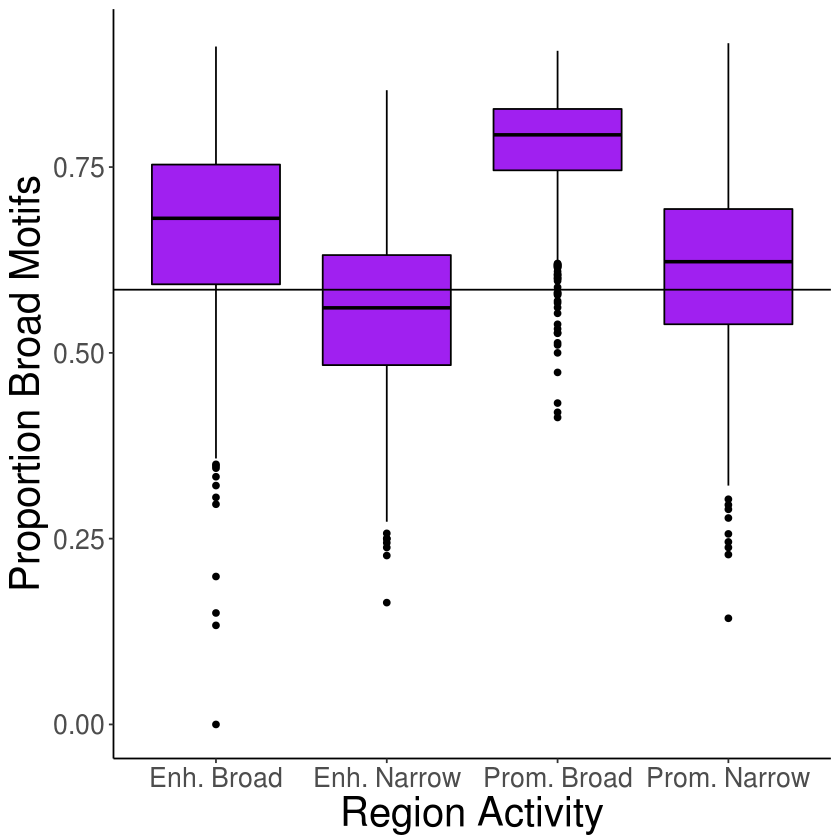

In [3]:
# HOCOMOCO
prom_broad_tf <- read_delim("../tf_counts/HOCOMOCO/all_prom_broad_s_600.bed","\t", escape_double = FALSE, trim_ws = TRUE)
prom_narr_tf <- read_delim("../tf_counts/HOCOMOCO/all_prom_narr_600.bed","\t", escape_double = FALSE, trim_ws = TRUE)
enh_broad_tf <- read_delim("../tf_counts/HOCOMOCO/all_enh_broad_600.bed","\t", escape_double = FALSE, trim_ws = TRUE)
enh_narr_tf <- read_delim("../tf_counts/HOCOMOCO/all_enh_narr_600.bed","\t", escape_double = FALSE, trim_ws = TRUE)

# proportions
diff <- data.frame(act = c(rep("Prom. Broad",1355),rep("Prom. Narrow",1355),rep("Enh. Broad",1961),rep("Enh. Narrow", 1961)), 
                   count = c(prom_broad_tf$broad/(prom_broad_tf$broad+prom_broad_tf$narrow),prom_narr_tf$broad/(prom_narr_tf$broad+prom_narr_tf$narrow),enh_broad_tf$broad/(enh_broad_tf$broad+enh_broad_tf$narrow),enh_narr_tf$broad/(enh_narr_tf$broad+enh_narr_tf$narrow)))

ggplot(diff,aes(x=act,y=count)) + geom_boxplot(color="black",fill="purple") +
  xlab("Region Activity") + ylab("Proportion Broad Motifs") + theme_classic() +
  theme(text = element_text(size=20),axis.title.x= element_text(size = 24),axis.title.y=element_text(size = 24)) + 
  geom_hline(yintercept = 0.585,color="black")

In [7]:
prom_broad_tf$sum <- prom_broad_tf$broad + prom_broad_tf$narrow
prom_narr_tf$sum <- prom_narr_tf$broad + prom_narr_tf$narrow
enh_broad_tf$sum <- enh_broad_tf$broad + enh_broad_tf$narrow
enh_narr_tf$sum <- enh_narr_tf$broad + enh_narr_tf$narrow

print(mean(prom_broad_tf$sum))
print(mean(prom_narr_tf$sum))
print(mean(enh_broad_tf$sum))
print(mean(enh_narr_tf$sum))

wilcox.test(prom_broad_tf$sum, prom_narr_tf$sum)
wilcox.test(enh_broad_tf$sum, enh_narr_tf$sum)

[1] 165.276
[1] 67.81919
[1] 107.8567
[1] 61.35645



	Wilcoxon rank sum test with continuity correction

data:  prom_broad_tf$sum and prom_narr_tf$sum
W = 1625300, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  enh_broad_tf$sum and enh_narr_tf$sum
W = 2844800, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [9]:
#HOCOMOCO overall: Broad TFs-145, Total TFs-248
binom.test(sum(prom_broad_tf$broad),sum(prom_broad_tf$broad)+sum(prom_broad_tf$narrow),p=0.585)
binom.test(sum(prom_narr_tf$broad),sum(prom_narr_tf$broad)+sum(prom_narr_tf$narrow),p=0.585)
binom.test(sum(enh_broad_tf$broad),sum(enh_broad_tf$broad)+sum(enh_broad_tf$narrow),p=0.585)
binom.test(sum(enh_narr_tf$broad),sum(enh_narr_tf$broad)+sum(enh_narr_tf$narrow),p=0.585)

print(mean(diff[diff$act == "Prom. Broad",]$count))
print(mean(diff[diff$act == "Prom. Narrow",]$count))
print(wilcox.test(diff[diff$act == "Prom. Broad",]$count,diff[diff$act == "Prom. Narrow",]$count)$p.value)
print(mean(diff[diff$act == "Enh. Broad",]$count))
print(mean(diff[diff$act == "Enh. Narrow",]$count))
print(wilcox.test(diff[diff$act == "Enh. Broad",]$count,diff[diff$act == "Enh. Narrow",]$count)$p.value)


	Exact binomial test

data:  sum(prom_broad_tf$broad) and sum(prom_broad_tf$broad) + sum(prom_broad_tf$narrow)
number of successes = 179720, number of trials = 223950, p-value <
2.2e-16
alternative hypothesis: true probability of success is not equal to 0.585
95 percent confidence interval:
 0.8008626 0.8041646
sample estimates:
probability of success 
             0.8025175 



	Exact binomial test

data:  sum(prom_narr_tf$broad) and sum(prom_narr_tf$broad) + sum(prom_narr_tf$narrow)
number of successes = 59675, number of trials = 91895, p-value <
2.2e-16
alternative hypothesis: true probability of success is not equal to 0.585
95 percent confidence interval:
 0.6462872 0.6524682
sample estimates:
probability of success 
             0.6493824 



	Exact binomial test

data:  sum(enh_broad_tf$broad) and sum(enh_broad_tf$broad) + sum(enh_broad_tf$narrow)
number of successes = 152100, number of trials = 211510, p-value <
2.2e-16
alternative hypothesis: true probability of success is not equal to 0.585
95 percent confidence interval:
 0.7172092 0.7210445
sample estimates:
probability of success 
             0.7191299 



	Exact binomial test

data:  sum(enh_narr_tf$broad) and sum(enh_narr_tf$broad) + sum(enh_narr_tf$narrow)
number of successes = 69148, number of trials = 120320, p-value =
4.459e-13
alternative hypothesis: true probability of success is not equal to 0.585
95 percent confidence interval:
 0.5719014 0.5774966
sample estimates:
probability of success 
             0.5747008 


[1] 0.7799081
[1] 0.6146494
[1] 3.480886e-289
[1] 0.6688614
[1] 0.557748
[1] 4.289406e-179


Parsed with column specification:
cols(
  `#chr` = col_character(),
  start = col_integer(),
  end = col_integer(),
  broad = col_integer(),
  narrow = col_integer()
)
Parsed with column specification:
cols(
  `#chr` = col_character(),
  start = col_integer(),
  end = col_integer(),
  broad = col_integer(),
  narrow = col_integer()
)
Parsed with column specification:
cols(
  `#chr` = col_character(),
  start = col_integer(),
  end = col_integer(),
  broad = col_integer(),
  narrow = col_integer()
)
Parsed with column specification:
cols(
  `#chr` = col_character(),
  start = col_integer(),
  end = col_integer(),
  broad = col_integer(),
  narrow = col_integer()
)


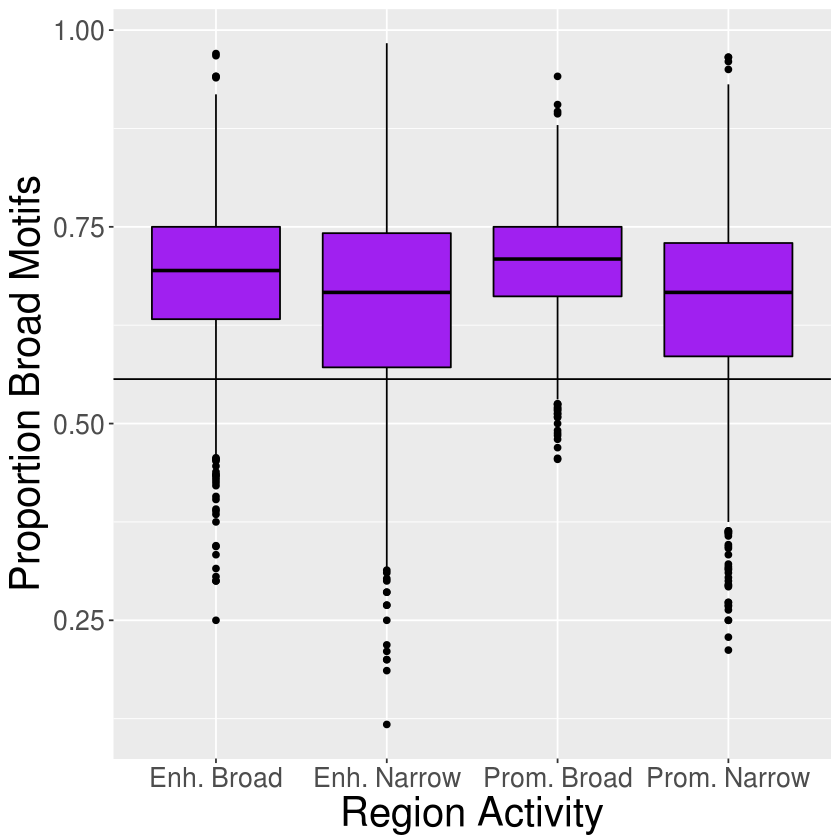

In [10]:
# JASPAR
prom_broad_tf <- read_delim("../tf_counts/jaspar/all_prom_broad_s_600.bed","\t", escape_double = FALSE, trim_ws = TRUE)
prom_narr_tf <- read_delim("../tf_counts/jaspar/all_prom_narr_600.bed","\t", escape_double = FALSE, trim_ws = TRUE)
enh_broad_tf <- read_delim("../tf_counts/jaspar/all_enh_broad_600.bed","\t", escape_double = FALSE, trim_ws = TRUE)
enh_narr_tf <- read_delim("../tf_counts/jaspar/all_enh_narr_600.bed","\t", escape_double = FALSE, trim_ws = TRUE)

# proportions
diff <- data.frame(act = c(rep("Prom. Broad",1355),rep("Prom. Narrow",1355),rep("Enh. Broad",1961),rep("Enh. Narrow", 1961)), 
                   count = c(prom_broad_tf$broad/(prom_broad_tf$broad+prom_broad_tf$narrow),prom_narr_tf$broad/(prom_narr_tf$broad+prom_narr_tf$narrow),enh_broad_tf$broad/(enh_broad_tf$broad+enh_broad_tf$narrow),enh_narr_tf$broad/(enh_narr_tf$broad+enh_narr_tf$narrow)))

ggplot(diff,aes(x=act,y=count)) + geom_boxplot(color="black",fill="purple") +
  xlab("Region Activity") + ylab("Proportion Broad Motifs") +
  theme(text = element_text(size=20),axis.title.x= element_text(size = 24),axis.title.y=element_text(size = 24)) + 
  geom_hline(yintercept = 0.5565,color="black")

In [11]:
binom.test(sum(prom_broad_tf$broad),sum(prom_broad_tf$broad)+sum(prom_broad_tf$narrow),p=0.585)
binom.test(sum(prom_narr_tf$broad),sum(prom_narr_tf$broad)+sum(prom_narr_tf$narrow),p=0.585)
binom.test(sum(enh_broad_tf$broad),sum(enh_broad_tf$broad)+sum(enh_broad_tf$narrow),p=0.585)
binom.test(sum(enh_narr_tf$broad),sum(enh_narr_tf$broad)+sum(enh_narr_tf$narrow),p=0.585)

print(mean(diff[diff$act == "Prom. Broad",]$count))
print(mean(diff[diff$act == "Prom. Narrow",]$count))
print(wilcox.test(diff[diff$act == "Prom. Broad",]$count,diff[diff$act == "Prom. Narrow",]$count)$p.value)
print(mean(diff[diff$act == "Enh. Broad",]$count))
print(mean(diff[diff$act == "Enh. Narrow",]$count))
print(wilcox.test(diff[diff$act == "Enh. Broad",]$count,diff[diff$act == "Enh. Narrow",]$count)$p.value)


	Exact binomial test

data:  sum(prom_broad_tf$broad) and sum(prom_broad_tf$broad) + sum(prom_broad_tf$narrow)
number of successes = 72273, number of trials = 101830, p-value <
2.2e-16
alternative hypothesis: true probability of success is not equal to 0.585
95 percent confidence interval:
 0.7069292 0.7125144
sample estimates:
probability of success 
             0.7097278 



	Exact binomial test

data:  sum(prom_narr_tf$broad) and sum(prom_narr_tf$broad) + sum(prom_narr_tf$narrow)
number of successes = 40739, number of trials = 61507, p-value <
2.2e-16
alternative hypothesis: true probability of success is not equal to 0.585
95 percent confidence interval:
 0.6585943 0.6660851
sample estimates:
probability of success 
             0.6623474 



	Exact binomial test

data:  sum(enh_broad_tf$broad) and sum(enh_broad_tf$broad) + sum(enh_broad_tf$narrow)
number of successes = 85480, number of trials = 122100, p-value <
2.2e-16
alternative hypothesis: true probability of success is not equal to 0.585
95 percent confidence interval:
 0.6974914 0.7026400
sample estimates:
probability of success 
             0.7000704 



	Exact binomial test

data:  sum(enh_narr_tf$broad) and sum(enh_narr_tf$broad) + sum(enh_narr_tf$narrow)
number of successes = 59134, number of trials = 88883, p-value <
2.2e-16
alternative hypothesis: true probability of success is not equal to 0.585
95 percent confidence interval:
 0.6621884 0.6684040
sample estimates:
probability of success 
             0.6653016 


[1] 0.7064214
[1] 0.6502428
[1] 3.530283e-41
[1] 0.6866068
[1] 0.6514657
[1] 2.727973e-18


***
[Contents](#Contents)

<a id='tomtom'></a>
### Tomtom results  (Fig. 4B&C)

In [15]:
spec <- read.csv("data/tf_motif_specificity.csv")
spec <- na.omit(spec)
spec$`Target ID` <- spec$X.Symbol..Human.
spec$X.Symbol..Human. <- NULL

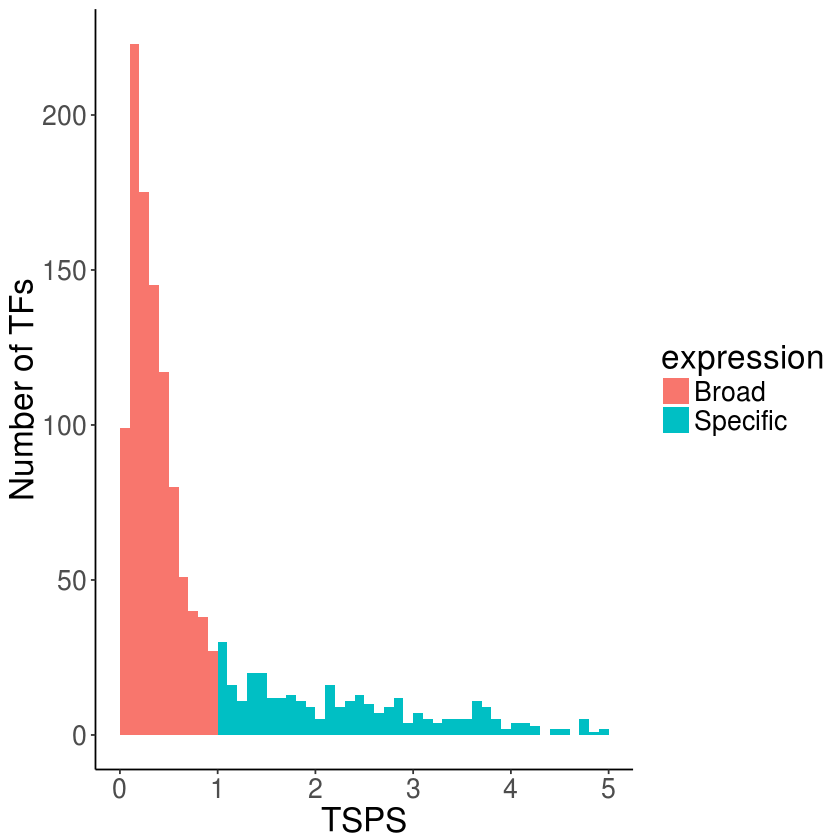

In [16]:
# Hist of TSPS
for (i in 1:nrow(spec)) {
  if (spec$Tissue.specificity.score[i] < 1) {spec$expression[i] <- "Broad"}
  else {spec$expression[i] <- "Specific"}}
ggplot(spec,aes(Tissue.specificity.score,fill=expression)) + geom_histogram(breaks = seq(0,5,by=0.1),closed="left")+ theme_classic()+
  theme(text = element_text(size=20))+xlab("TSPS") + ylab("Number of TFs")

In [56]:
#swap with other databases as necessary
f <- read_delim('motif_sim/hocomoco/top_enh/tomtom.txt',delim="\t",col_names =T)
#f <- read_delim('motif_sim/hocomoco/top_prom/tomtom.txt',delim="\t",col_names =T)
#f <- read_delim('motif_sim/hocomoco/bottom_enh/tomtom.txt',delim="\t",col_names =T)
#f <- read_delim('motif_sim/hocomoco/bottom_prom/tomtom.txt',delim="\t",col_names =T)

Parsed with column specification:
cols(
  `#Query ID` = col_character(),
  `Target ID` = col_character(),
  `Optimal offset` = col_integer(),
  `p-value` = col_double(),
  `E-value` = col_double(),
  `q-value` = col_double(),
  Overlap = col_integer(),
  `Query consensus` = col_character(),
  `Target consensus` = col_character(),
  Orientation = col_character()
)


In [ ]:
#JASPAR TFs
# manually fill in some of the NAs that had different syntax/alternate names or were in complex in JASPAR
# for complexes, chose most tissue-specific value
t <- left_join(f,spec)
t[is.na(t)]<- 100
for (i in 1:nrow(t)) {
  if (t$Target.ID[i] == "BATF::JUN") {t$Tissue.specificity.score[i] <- 1.14}
  if (t$Target.ID[i] == "EBF1") {t$Tissue.specificity.score[i] <- 0.73}
  if (t$Target.ID[i] == "EWSR1-FLI1") {t$Tissue.specificity.score[i] <- 0.81}
  if (t$Target.ID[i] == "HINFP") {t$Tissue.specificity.score[i] <- 0.12}
  if (t$Target.ID[i] == "JUN(var.2)") {t$Tissue.specificity.score[i] <- 0.45}
  if (t$Target.ID[i] == "JUND(var.2)") {t$Tissue.specificity.score[i] <- 0.18}
  if (t$Target.ID[i] == "MYC::MAX") {t$Tissue.specificity.score[i] <- 0.58}
  if (t$Target.ID[i] == "NFE2::MAF") {t$Tissue.specificity.score[i] <- 3.12}
  if (t$Target.ID[i] == "NR1H2::RXRA") {t$Tissue.specificity.score[i] <- 0.20}
  if (t$Target.ID[i] == "Pax6") {t$Tissue.specificity.score[i] <- 2.66}
  if (t$Target.ID[i] == "RXRA::VDR") {t$Tissue.specificity.score[i] <- 1.08}
  if (t$Target.ID[i] == "SMAD2::SMAD3::SMAD4") {t$Tissue.specificity.score[i] <- 0.20}
  if (t$Target.ID[i] == "STAT2::STAT1") {t$Tissue.specificity.score[i] <- 0.33}
  if (t$Target.ID[i] == "TAL1::GATA1") {t$Tissue.specificity.score[i] <- 3.76}
  if (t$Target.ID[i] == "TAL1::TCF3") {t$Tissue.specificity.score[i] <- 2.37}
  if (t$Target.ID[i] == "TLX1::NFIC") {t$Tissue.specificity.score[i] <- 3.68}
  if (t$Target.ID[i] == "TP63") {t$Tissue.specificity.score[i] <- 1.99}
  if (t$Target.ID[i] == "ZEB1") {t$Tissue.specificity.score[i] <- 0.92}
  if (t$Tissue.specificity.score[i] >= 1) {t$expression[i] <- "specific"}
  if (t$Tissue.specificity.score[i] < 1) (t$expression[i] <- "broad")
}
t <- t[-which(t$Tissue.specificity.score == 100),]
t <- t[c(1,2,4,12)]

In [57]:
#fix HOCOMOCO ID formatting
for (i in 1:nrow(f)) {
    f$tf[i] <- strsplit(f$`Target ID`[i],"_")[[1]][1]
}
f$`Target ID` <- f$tf
f$tf <- NULL

Warning message:
“Unknown or uninitialised column: 'tf'.”

In [58]:
#CISBP and/or HOCOMOCO
# manually fill in some of the NAs that had different syntax/alternate names or were in complex
# for complexes, chose most tissue-specific value
t <- left_join(f,spec)
t[is.na(t)]<- 100
for (i in 1:nrow(t)){
  t$Fantom.ID[i] <- t$`Target ID`[i]
  if (t$`Target ID`[i] == "ALX1") {t$Tissue.specificity.score[i] <- 1.91
  t$Fantom.ID[i] <- "CART1"}
  if (t$`Target ID`[i] == "BATF3") {t$Tissue.specificity.score[i] <- 0.34
  t$Fantom.ID[i] <- "SNFT"}
  if (t$`Target ID`[i] == "BHLHA15") {t$Tissue.specificity.score[i] <- 2.86
  t$Fantom.ID[i] <- "BHLHB8"}
  if (t$`Target ID`[i] == "BHLHE40") {t$Tissue.specificity.score[i] <- 0.36
  t$Fantom.ID[i] <- "BHLHB2"}
  if (t$`Target ID`[i] == "BHLHE41") {t$Tissue.specificity.score[i] <- 0.89
  t$Fantom.ID[i] <- "BHLHB3"}
  if (t$`Target ID`[i] == "BPTF") {t$Tissue.specificity.score[i] <- 0.51
  t$Fantom.ID[i] <- "FALZ"}
  if (t$`Target ID`[i] == "CGBP") {t$Tissue.specificity.score[i] <- 0.07
  t$Fantom.ID[i] <- "CXXC1"}
  if (t$`Target ID`[i] == "CUX1") {t$Tissue.specificity.score[i] <- 0.19
  t$Fantom.ID[i] <- "CUTL1"}
  if (t$`Target ID`[i] == "EBF1") {t$Tissue.specificity.score[i] <- 0.73
  t$Fantom.ID[i] <- "EBF"}
  if (t$`Target ID`[i] == "FOXO4") {t$Tissue.specificity.score[i] <- 0.84
  t$Fantom.ID[i] <- "MLLT7"}
  if (t$`Target ID`[i] == "GSC2") {t$Tissue.specificity.score[i] <- 3.74
  t$Fantom.ID[i] <- "GSCL"}
  if (t$`Target ID`[i] == "HDX") {t$Tissue.specificity.score[i] <- 1
  t$Fantom.ID[i] <- "CXorf43"}
  if (t$`Target ID`[i] == "HINFP") {t$Tissue.specificity.score[i] <- 0.12
  t$Fantom.ID[i] <- "MIZF"}
  if (t$`Target ID`[i] == "HLTF") {t$Tissue.specificity.score[i] <- 0.99
  t$Fantom.ID[i] <- "SMARCA3"}
  if (t$`Target ID`[i] == "HNF1A") {t$Tissue.specificity.score[i] <- 1.63
  t$Fantom.ID[i] <- "TCF1"}
  if (t$`Target ID`[i] == "HNF1B") {t$Tissue.specificity.score[i] <- 2.68
  t$Fantom.ID[i] <- "TCF2"}
  if (t$`Target ID`[i] == "HOMEZ") {t$Tissue.specificity.score[i] <- 0.1
  t$Fantom.ID[i] <- "KIAA1443"}
  if (t$`Target ID`[i] == "IRF9") {t$Tissue.specificity.score[i] <- 0.22
  t$Fantom.ID[i] <- "ISGF3G"}
  if (t$`Target ID`[i] == "KDM2B") {t$Tissue.specificity.score[i] <- 0.29
  t$Fantom.ID[i] <- "FBXL10"}
  if (t$`Target ID`[i] == "LCOR") {t$Tissue.specificity.score[i] <- 0.34
  t$Fantom.ID[i] <- "MLR2"}
  if (t$`Target ID`[i] == "MECOM") {t$Tissue.specificity.score[i] <- 1.25
  t$Fantom.ID[i] <- "EVI1"}
  if (t$`Target ID`[i] == "MZF1") {t$Tissue.specificity.score[i] <- 0.11
  t$Fantom.ID[i] <- "ZNF42"}
  if (t$`Target ID`[i] == "NKX2-1") {t$Tissue.specificity.score[i] <- 3.35
  t$Fantom.ID[i] <- "TITF1"}
  if (t$`Target ID`[i] == "PDX1") {t$Tissue.specificity.score[i] <- 4.72
  t$Fantom.ID[i] <- "IPF1"}
  if (t$`Target ID`[i] == "RBPJ") {t$Tissue.specificity.score[i] <- 0.3
  t$Fantom.ID[i] <- "RBPSUH"}
  if (t$`Target ID`[i] == "RFX6") {t$Tissue.specificity.score[i] <- 2.32
  t$Fantom.ID[i] <- "RFXDC1"}
  if (t$`Target ID`[i] == "RHOXF1") {t$Tissue.specificity.score[i] <- 2.98
  t$Fantom.ID[i] <- "OTEX"}
  if (t$`Target ID`[i] == "TGIF1") {t$Tissue.specificity.score[i] <- 0.34
  t$Fantom.ID[i] <- "TGIF"}
  if (t$`Target ID`[i] == "TP63") {t$Tissue.specificity.score[i] <- 1.99
  t$Fantom.ID[i] <- "TP73L"}
  if (t$`Target ID`[i] == "VSX2") {t$Tissue.specificity.score[i] <- 1.38
  t$Fantom.ID[i] <- "CHX10"}
  if (t$`Target ID`[i] == "ZEB1") {t$Tissue.specificity.score[i] <- 0.92
  t$Fantom.ID[i] <- "TCF8"}
  if (t$`Target ID`[i] == "ZFHX3") {t$Tissue.specificity.score[i] <- 0.47
  t$Fantom.ID[i] <- "ATBF1"}
  if (t$`Target ID`[i] == "ZSCAN16") {t$Tissue.specificity.score[i] <- 0.25
  t$Fantom.ID[i] <- "ZNF435"}
}
motifs <- t[-which(t$Tissue.specificity.score == 100),]
motifs <- t[-which(t$expression == 100),]
motifs <- motifs[c(1,2,4,12)]

Joining, by = "Target ID"
Warning message:
“Column `Target ID` joining character vector and factor, coercing into character vector”Warning message:
“Unknown or uninitialised column: 'Fantom.ID'.”

In [59]:
#run analyses on kmers in question
top_enh <- c("GACTCA","GAGTCA","CAGGAA","ACTCAT","ACAGGA")
bot_enh <- c("CACCTG", "GTGACA","CTCAAA","GTCTCA", "AGGTGA")
top_prom <- c("CGGAAG", "CCGGAA", "GGCGGA", "CCCGCC", "ATGGCG")
bot_prom <- c("CCAGGC", "AGGCCA", "CCCAAC", "CCTGGC", "AGGTCA")

In [60]:
kmers <- top_enh
top <- motifs

[1] "GACTCA"
Broad:  0.6116695    Specific:  0.5501165
	Wilcoxon rank sum test with continuity correction

data:  top[which(top$`#Query ID` == mer & top$expression == "Broad"),  and top[which(top$`#Query ID` == mer & top$expression == "Specific"),     ]$`p-value` and     ]$`p-value`
W = 6397.5, p-value = 0.09126
alternative hypothesis: true location shift is not equal to 0

[1] "GAGTCA"
Broad:  0.4780856    Specific:  0.4456105
	Wilcoxon rank sum test with continuity correction

data:  top[which(top$`#Query ID` == mer & top$expression == "Broad"),  and top[which(top$`#Query ID` == mer & top$expression == "Specific"),     ]$`p-value` and     ]$`p-value`
W = 6017, p-value = 0.3966
alternative hypothesis: true location shift is not equal to 0

[1] "CAGGAA"
Broad:  0.4489171    Specific:  0.4335311
	Wilcoxon rank sum test with continuity correction

data:  top[which(top$`#Query ID` == mer & top$expression == "Broad"),  and top[which(top$`#Query ID` == mer & top$expression == "Specific"),  

Joining, by = "#Query ID"
Warning message:
“Column `#Query ID` joining factor and character vector, coercing into character vector”Joining, by = c("#Query ID", "Target ID", "p-value", "expression")
Joining, by = c("#Query ID", "Target ID", "p-value", "expression")
Joining, by = c("#Query ID", "Target ID", "p-value", "expression")
Joining, by = c("#Query ID", "Target ID", "p-value", "expression")
Warning message:
“Removed 68 rows containing non-finite values (stat_boxplot).”

Warning message:
“Removed 68 rows containing non-finite values (stat_boxplot).”

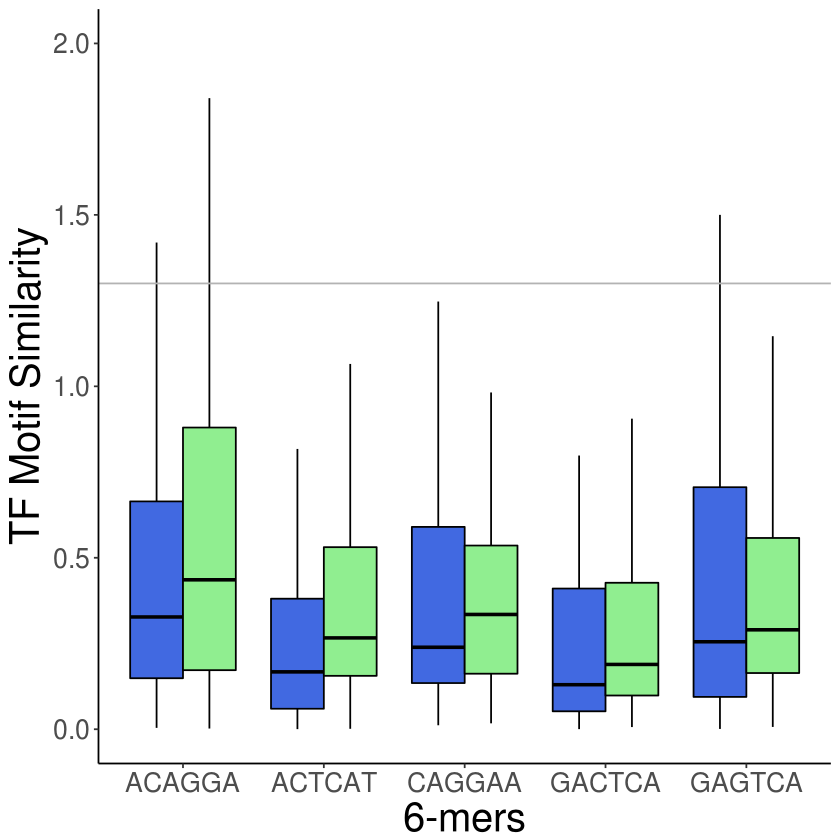

In [61]:
for (mer in kmers) {
  print(mer)
  cat("Broad: ",mean(top[which(top$`#Query ID` == mer & top$expression == "Broad"),]$`p-value`))
  cat("    Specific: ",mean(top[which(top$`#Query ID` == mer & top$expression == "Specific"),]$`p-value`))
  print(wilcox.test(top[which(top$`#Query ID` == mer & top$expression == "Broad"),]$`p-value`,top[which(top$`#Query ID` == mer & top$expression == "Specific"),]$`p-value`))
}
plot <- data.frame(`#Query ID` = c("blank"))
plot$`#Query ID` <- plot$X.Query.ID
plot$X.Query.ID <- NULL
for (mer in kmers) {
  plot <- full_join(plot,top[which(top$`#Query ID` == mer),])
}
plot <- plot[-which(plot$`#Query ID` == "blank"),]
plot$log <- -log(plot$`p-value`,base = 10)

ggplot(plot,aes(x=`#Query ID`,y=log,fill=expression)) + geom_boxplot(color="black",outlier.shape=NA) + scale_fill_manual(values=c("royalblue","lightgreen"))  + xlab("6-mers") + 
    theme_classic() + ylab("TF Motif Similarity") + ylim(0,2) +
    theme(text = element_text(size=20),axis.title.x= element_text(size = 24),axis.title.y=element_text(size = 24),legend.position="none") + 
    geom_abline(intercept=1.3,slope=0,color = "grey70")
ggsave("../top_enh.pdf",width = 7, height = 5,units="in")

In [29]:
plot <- plot[plot$`p-value` < 0.05,]
plot <- plot[order(plot$`p-value`),]

,#Query ID,Target ID,p-value,expression,log
2,GACTCA,FOS,3.98271e-05,Broad,4.399821
219,GAGTCA,FOS,3.98271e-05,Broad,4.399821
3,GACTCA,JUNB,5.97401e-05,Broad,4.223734
4,GACTCA,JUND,5.97401e-05,Broad,4.223734
5,GACTCA,JUN,5.97401e-05,Broad,4.223734
220,GAGTCA,JUNB,5.97401e-05,Broad,4.223734


In [34]:
plot[plot$`#Query ID` == "CAGGAA",]

,#Query ID,Target ID,p-value,expression,log
436,CAGGAA,ETV4,0.000182527,Broad,3.738673
437,CAGGAA,ERG,0.000725289,Broad,3.139489
438,CAGGAA,ETS1,0.000938409,Broad,3.027608
439,CAGGAA,STAT6,0.001312450,Broad,2.881917
440,CAGGAA,TEAD4,0.001510290,Specific,2.820940
441,CAGGAA,ETV5,0.001698920,Broad,2.769827
442,CAGGAA,BCL6,0.002134050,Broad,2.670795
443,CAGGAA,ELF3,0.002553670,Specific,2.592835
444,CAGGAA,TEAD1,0.002618340,Broad,2.581974
445,CAGGAA,LYL1,0.002708720,Specific,2.567236


***
[Contents](#Contents)

<a id='tfLength'></a>
### correlation between TF motif length and 6-mers

In [34]:
top_enh <- read_delim('motif_sim/jaspar/2016-10-18_top_enh.txt',delim = '\t',col_names = T)
top_prom <- read_delim('motif_sim/jaspar/2016-10-18_top_prom.txt',delim = '\t',col_names = T)
bottom_prom <- read_delim('motif_sim/jaspar/2016-10-18_bottom_prom.txt',delim = '\t',col_names = T)
bottom_enh <- read_delim('motif_sim/jaspar/2016-10-18_bottom_enh.txt',delim = '\t',col_names = T)
top_enh <- top_enh[c(4,9)]
top_prom <- top_prom[c(4,9)]
bottom_prom<- bottom_prom[c(4,9)]
bottom_enh <- bottom_enh[c(4,9)]

Parsed with column specification:
cols(
  `#Query ID` = col_character(),
  `Target ID` = col_character(),
  `Optimal offset` = col_integer(),
  `p-value` = col_double(),
  `E-value` = col_double(),
  `q-value` = col_double(),
  Overlap = col_integer(),
  `Query consensus` = col_character(),
  `Target consensus` = col_character(),
  Orientation = col_character()
)
Parsed with column specification:
cols(
  `#Query ID` = col_character(),
  `Target ID` = col_character(),
  `Optimal offset` = col_integer(),
  `p-value` = col_double(),
  `E-value` = col_double(),
  `q-value` = col_double(),
  Overlap = col_integer(),
  `Query consensus` = col_character(),
  `Target consensus` = col_character(),
  Orientation = col_character()
)
Parsed with column specification:
cols(
  `#Query ID` = col_character(),
  `Target ID` = col_character(),
  `Optimal offset` = col_integer(),
  `p-value` = col_double(),
  `E-value` = col_double(),
  `q-value` = col_double(),
  Overlap = col_integer(),
  `Query consen

In [35]:
for (i in 1:nrow(top_enh)) {
    top_enh$motif_length[i] <- nchar(top_enh$`Target consensus`[i])
}
for (i in 1:nrow(top_prom)) {
    top_prom$motif_length[i] <- nchar(top_prom$`Target consensus`[i])
}
for (i in 1:nrow(bottom_prom)) {
    bottom_prom$motif_length[i] <- nchar(bottom_prom$`Target consensus`[i])
}
for (i in 1:nrow(bottom_enh)) {
    bottom_enh$motif_length[i] <- nchar(bottom_enh$`Target consensus`[i])
}

Warning message:
“Unknown or uninitialised column: 'motif_length'.”Warning message:
“Unknown or uninitialised column: 'motif_length'.”Warning message:
“Unknown or uninitialised column: 'motif_length'.”Warning message:
“Unknown or uninitialised column: 'motif_length'.”

In [36]:
cor.test(top_enh$`p-value`, top_enh$motif_length,method="spearman")
cor.test(top_prom$`p-value`, top_prom$motif_length,method="spearman")
cor.test(bottom_enh$`p-value`, bottom_enh$motif_length,method="spearman")
cor.test(bottom_prom$`p-value`, bottom_prom$motif_length,method="spearman")

Warning message in cor.test.default(top_enh$`p-value`, top_enh$motif_length, method = "spearman"):
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  top_enh$`p-value` and top_enh$motif_length
S = 46466000, p-value = 0.03515
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.08128206 


In [47]:
all <- unique(full_join(full_join(full_join(top_enh, top_prom),bottom_enh),bottom_prom))
cor.test(all$motif_length, all$`p-value`, method="spearman")

Joining, by = c("p-value", "Target consensus", "motif_length")
Joining, by = c("p-value", "Target consensus", "motif_length")
Joining, by = c("p-value", "Target consensus", "motif_length")
Warning message in cor.test.default(all$motif_length, all$`p-value`, method = "spearman"):
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  all$motif_length and all$`p-value`
S = 4973400000, p-value = 0.005996
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.0489213 


***
[Contents](#Contents)

<a id='weights'></a>
### feature weight summary for enh. vs. prom. classifiers (Fig 1C&D)


In [2]:
#path = "classifiers/roadmap_enhVSprom"
path = "classifiers/fantom_enhVsprom/"

#pull and combine weights for all subsets
enh <- data.frame(weight = c("blank"), kmer = c("blank"))
prom <- data.frame(weight = c("blank"), kmer = c("blank"))
for (dir in list.files(path)) {
    weight_file = paste(paste(paste(path,dir,sep=""),dir,sep="/"),"kernel-feature-weights.txt",sep="_")
    print(weight_file)
    tmp <- suppressWarnings(read_delim(weight_file, 
                   comment = "#", col_names = T, delim = "\t"))
    tmp <- tmp[c(1,2)]
    colnames(tmp) <- c("weight","kmer")
    tmp <- tmp[-which(tmp$weight == ">Spectrum6"),]
    #if (grepl("enhancers", dir, fixed=TRUE)) {
    if (grepl("promMatch", dir, fixed=TRUE)) {
        enh <- full_join(enh,tmp)
    }else {
        prom <- full_join(prom,tmp)
    }
}
enh$weight <- as.numeric(enh$weight)
prom$weight <- as.numeric(prom$weight)
enh <- enh[enh$kmer != "blank",]
prom <- prom[prom$kmer != "blank",]
print(head(enh))
enhancer_pos <- enh %>% group_by(kmer) %>% summarize(mean_w = mean(weight))
promoter_pos <- prom %>% group_by(kmer) %>% summarize(mean_w = mean(weight))

[1] "../results/predictions/fantom_enhVsprom/2018-05-28__MKL_1kern_spectrum6__fantom_600bp_promMatch_1/2018-05-28__MKL_1kern_spectrum6__fantom_600bp_promMatch_1_kernel-feature-weights.txt"


Parsed with column specification:
cols(
  `>Spectrum6` = col_character(),
  `1` = col_character(),
  `1_1` = col_integer()
)
Joining, by = c("weight", "kmer")
Warning message:
“Column `weight` joining factor and character vector, coercing into character vector”Warning message:
“Column `kmer` joining factor and character vector, coercing into character vector”

[1] "../results/predictions/fantom_enhVsprom/2018-05-28__MKL_1kern_spectrum6__fantom_600bp_promMatch_2/2018-05-28__MKL_1kern_spectrum6__fantom_600bp_promMatch_2_kernel-feature-weights.txt"


Parsed with column specification:
cols(
  `>Spectrum6` = col_character(),
  `1` = col_character(),
  `1_1` = col_integer()
)
Joining, by = c("weight", "kmer")


[1] "../results/predictions/fantom_enhVsprom/2018-05-28__MKL_1kern_spectrum6__fantom_600bp_promMatch_3/2018-05-28__MKL_1kern_spectrum6__fantom_600bp_promMatch_3_kernel-feature-weights.txt"


Parsed with column specification:
cols(
  `>Spectrum6` = col_character(),
  `1` = col_character(),
  `1_1` = col_integer()
)
Joining, by = c("weight", "kmer")


[1] "../results/predictions/fantom_enhVsprom/2018-05-28__MKL_1kern_spectrum6__fantom_600bp_promMatch_4/2018-05-28__MKL_1kern_spectrum6__fantom_600bp_promMatch_4_kernel-feature-weights.txt"


Parsed with column specification:
cols(
  `>Spectrum6` = col_character(),
  `1` = col_character(),
  `1_1` = col_integer()
)
Joining, by = c("weight", "kmer")


[1] "../results/predictions/fantom_enhVsprom/2018-05-28__MKL_1kern_spectrum6__fantom_600bp_promMatch_5/2018-05-28__MKL_1kern_spectrum6__fantom_600bp_promMatch_5_kernel-feature-weights.txt"


Parsed with column specification:
cols(
  `>Spectrum6` = col_character(),
  `1` = col_character(),
  `1_1` = col_integer()
)
Joining, by = c("weight", "kmer")


[1] "../results/predictions/fantom_enhVsprom/2018-05-28__MKL_1kern_spectrum6__fantom_600bp_promMatch_6/2018-05-28__MKL_1kern_spectrum6__fantom_600bp_promMatch_6_kernel-feature-weights.txt"


Parsed with column specification:
cols(
  `>Spectrum6` = col_character(),
  `1` = col_character(),
  `1_1` = col_integer()
)
Joining, by = c("weight", "kmer")


[1] "../results/predictions/fantom_enhVsprom/2018-05-28__MKL_1kern_spectrum6__fantom_600bp_promMatch_7/2018-05-28__MKL_1kern_spectrum6__fantom_600bp_promMatch_7_kernel-feature-weights.txt"


Parsed with column specification:
cols(
  `>Spectrum6` = col_character(),
  `1` = col_character(),
  `1_1` = col_integer()
)
Joining, by = c("weight", "kmer")


[1] "../results/predictions/fantom_enhVsprom/2018-05-28__MKL_1kern_spectrum6__fantom_600bp_promMatch_8/2018-05-28__MKL_1kern_spectrum6__fantom_600bp_promMatch_8_kernel-feature-weights.txt"


Parsed with column specification:
cols(
  `>Spectrum6` = col_character(),
  `1` = col_character(),
  `1_1` = col_integer()
)
Joining, by = c("weight", "kmer")


[1] "../results/predictions/fantom_enhVsprom/2018-05-28__MKL_1kern_spectrum6__int_prom_600_1/2018-05-28__MKL_1kern_spectrum6__int_prom_600_1_kernel-feature-weights.txt"


Parsed with column specification:
cols(
  `>Spectrum6` = col_character(),
  `1` = col_character(),
  `1_1` = col_integer()
)
Joining, by = c("weight", "kmer")
Warning message:
“Column `weight` joining factor and character vector, coercing into character vector”Warning message:
“Column `kmer` joining factor and character vector, coercing into character vector”

[1] "../results/predictions/fantom_enhVsprom/2018-05-28__MKL_1kern_spectrum6__int_prom_600_2/2018-05-28__MKL_1kern_spectrum6__int_prom_600_2_kernel-feature-weights.txt"


Parsed with column specification:
cols(
  `>Spectrum6` = col_character(),
  `1` = col_character(),
  `1_1` = col_integer()
)
Joining, by = c("weight", "kmer")


[1] "../results/predictions/fantom_enhVsprom/2018-05-28__MKL_1kern_spectrum6__int_prom_600_3/2018-05-28__MKL_1kern_spectrum6__int_prom_600_3_kernel-feature-weights.txt"


Parsed with column specification:
cols(
  `>Spectrum6` = col_character(),
  `1` = col_character(),
  `1_1` = col_integer()
)
Joining, by = c("weight", "kmer")


[1] "../results/predictions/fantom_enhVsprom/2018-05-28__MKL_1kern_spectrum6__int_prom_600_4/2018-05-28__MKL_1kern_spectrum6__int_prom_600_4_kernel-feature-weights.txt"


Parsed with column specification:
cols(
  `>Spectrum6` = col_character(),
  `1` = col_character(),
  `1_1` = col_integer()
)
Joining, by = c("weight", "kmer")


[1] "../results/predictions/fantom_enhVsprom/2018-05-28__MKL_1kern_spectrum6__int_prom_600_5/2018-05-28__MKL_1kern_spectrum6__int_prom_600_5_kernel-feature-weights.txt"


Parsed with column specification:
cols(
  `>Spectrum6` = col_character(),
  `1` = col_character(),
  `1_1` = col_integer()
)
Joining, by = c("weight", "kmer")


[1] "../results/predictions/fantom_enhVsprom/2018-05-28__MKL_1kern_spectrum6__int_prom_600_6/2018-05-28__MKL_1kern_spectrum6__int_prom_600_6_kernel-feature-weights.txt"


Parsed with column specification:
cols(
  `>Spectrum6` = col_character(),
  `1` = col_character(),
  `1_1` = col_integer()
)
Joining, by = c("weight", "kmer")


[1] "../results/predictions/fantom_enhVsprom/2018-05-28__MKL_1kern_spectrum6__int_prom_600_7/2018-05-28__MKL_1kern_spectrum6__int_prom_600_7_kernel-feature-weights.txt"


Parsed with column specification:
cols(
  `>Spectrum6` = col_character(),
  `1` = col_character(),
  `1_1` = col_integer()
)
Joining, by = c("weight", "kmer")


[1] "../results/predictions/fantom_enhVsprom/2018-05-29__MKL_1kern_spectrum6__fantom_600bp_promMatch_9/2018-05-29__MKL_1kern_spectrum6__fantom_600bp_promMatch_9_kernel-feature-weights.txt"


Parsed with column specification:
cols(
  `>Spectrum6` = col_character(),
  `1` = col_character(),
  `1_1` = col_integer()
)
Joining, by = c("weight", "kmer")


[1] "../results/predictions/fantom_enhVsprom/2018-05-29__MKL_1kern_spectrum6__int_prom_600_8/2018-05-29__MKL_1kern_spectrum6__int_prom_600_8_kernel-feature-weights.txt"


Parsed with column specification:
cols(
  `>Spectrum6` = col_character(),
  `1` = col_character(),
  `1_1` = col_integer()
)
Joining, by = c("weight", "kmer")


[1] "../results/predictions/fantom_enhVsprom/2018-05-29__MKL_1kern_spectrum6__int_prom_600_9/2018-05-29__MKL_1kern_spectrum6__int_prom_600_9_kernel-feature-weights.txt"


Parsed with column specification:
cols(
  `>Spectrum6` = col_character(),
  `1` = col_character(),
  `1_1` = col_integer()
)
Joining, by = c("weight", "kmer")
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

   weight   kmer
2 54.5491 TGACTC
3 54.5491 GAGTCA
4 43.5203 GGGCCC
5 38.2744 TGAGTC
6 38.2744 GACTCA
7 34.4589 CGTGTG


In [3]:
# calculate CpG and GC content
enhancer_pos$GC <- 0.0
promoter_pos$GC <- 0.0
enhancer_pos$CpG <- 0.0
promoter_pos$CpG <- 0.0

for (seq in 1:nrow(enhancer_pos)) {
    enhancer_pos$GC[seq] <- str_count(enhancer_pos$kmer[seq], "G")+ str_count(enhancer_pos$kmer[seq], "C")
    promoter_pos$GC[seq] <- str_count(promoter_pos$kmer[seq], "C")+ str_count(promoter_pos$kmer[seq], "G")
    enhancer_pos$CpG[seq] <- str_count(enhancer_pos$kmer[seq], "CG")
    promoter_pos$CpG[seq] <- str_count(promoter_pos$kmer[seq], "CG")
}


In [5]:
# run correlations
print(cor.test(enhancer_pos$GC,enhancer_pos$mean_w,method="spearman"))
print(cor.test(enhancer_pos$CpG,enhancer_pos$mean_w,method="spearman"))
print(cor.test(promoter_pos$GC,promoter_pos$mean_w,method="spearman"))
print(cor.test(promoter_pos$CpG,promoter_pos$mean_w,method="spearman"))

Warning message in cor.test.default(enhancer_pos$GC, enhancer_pos$mean_w, method = "spearman"):
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  enhancer_pos$GC and enhancer_pos$mean_w
S = 1.5808e+10, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.3802505 



Warning message in cor.test.default(enhancer_pos$CpG, enhancer_pos$mean_w, method = "spearman"):
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  enhancer_pos$CpG and enhancer_pos$mean_w
S = 1.7916e+10, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.5642649 



Warning message in cor.test.default(promoter_pos$GC, promoter_pos$mean_w, method = "spearman"):
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  promoter_pos$GC and promoter_pos$mean_w
S = 7098100000, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.3802505 



Warning message in cor.test.default(promoter_pos$CpG, promoter_pos$mean_w, method = "spearman"):
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  promoter_pos$CpG and promoter_pos$mean_w
S = 4990600000, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5642649 



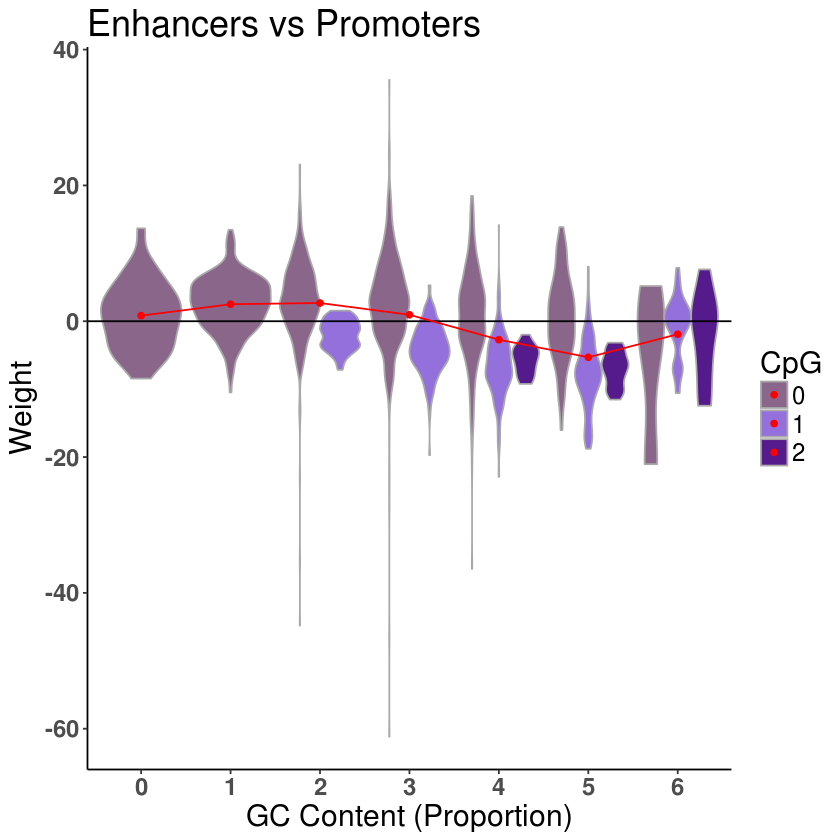

In [53]:
# plots
cols = c("plum4","mediumpurple","purple4")

enhancer_pos$CpG <- as.factor(enhancer_pos$CpG)
enhancer_pos$GC <- as.factor(enhancer_pos$GC)
line_plot <- data.frame(x = as.factor(unique(enhancer_pos$GC)))
line_plot$CpG <- as.factor(0)
for (i in 1:nrow(line_plot)) {
  line_plot$y[i] <- mean(enhancer_pos[enhancer_pos$GC == line_plot$x[i],]$mean_w)}
ggplot(enhancer_pos,aes(x=GC,y=mean_w,fill=CpG)) + geom_violin(color="darkgrey",scale = "width") +
  geom_hline(yintercept=0,color = "black") + scale_fill_manual(values=cols) + theme_classic() +
  labs(x="GC Content (Proportion)",y="Weight",title = "Enhancers vs Promoters") +
  theme(text = element_text(size=18),axis.text.x = element_text(face = "bold"),axis.text.y = element_text(face = "bold")) + 
  geom_line(data = line_plot, aes(x= x, y = y,group=1),color="red") + geom_point(data = line_plot, aes(x= x, y = y,group=1),color="red")

#ggsave("../enh_pos.pdf",width = 6, height = 5,units="in")

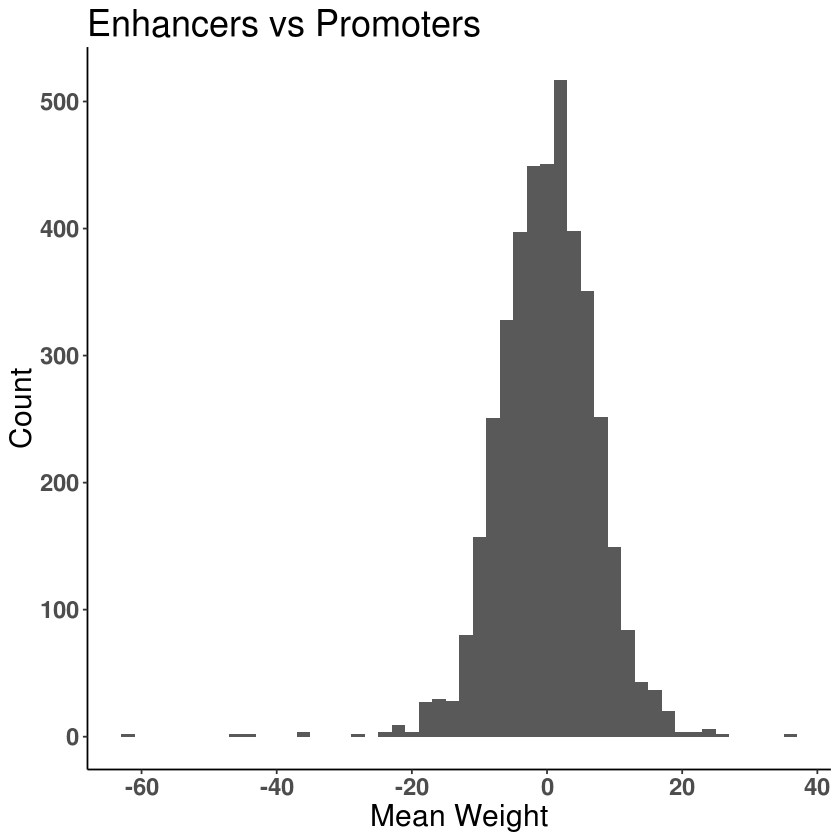

In [7]:
ggplot(enhancer_pos,aes(mean_w)) + geom_histogram(binwidth=2) + theme_classic() +
  labs(x= "Mean Weight",y="Count",title = "Enhancers vs Promoters") +
  theme(text = element_text(size=18),axis.text.x = element_text(face = "bold"),axis.text.y = element_text(face = "bold"))
ggsave("../enh_pos_weight_dist.pdf",width = 6, height = 5,units="in")

In [17]:
tail(promoter_pos[order(promoter_pos$mean_w),])

kmer,mean_w,GC,CpG
AGGTAA,44.81706,2,0
TTACCT,44.81706,2,0
CAGGTA,46.44511,3,0
TACCTG,46.44511,3,0
CTTACC,61.17779,3,0
GGTAAG,61.17779,3,0


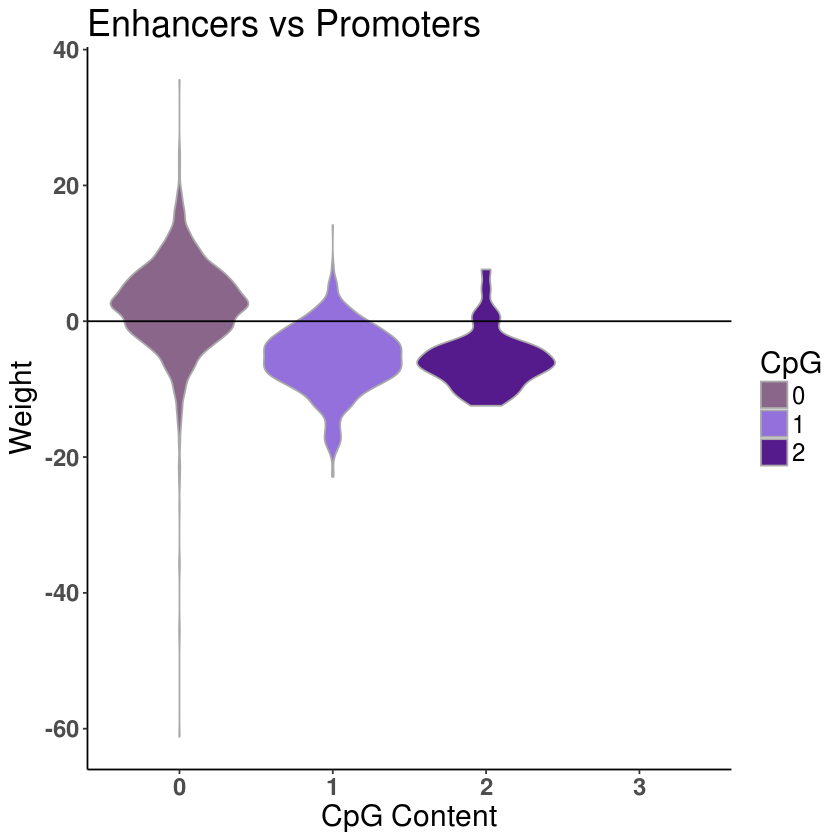

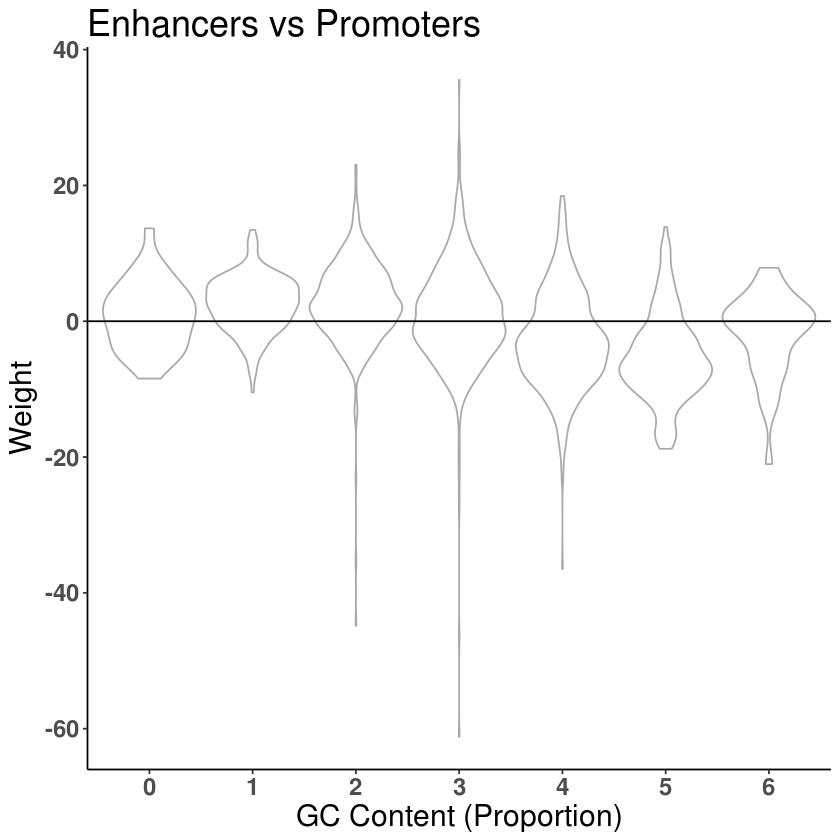

In [11]:
cols = c("plum4","mediumpurple","purple4")

enhancer_pos$CpG <- as.factor(enhancer_pos$CpG)
enhancer_pos$GC <- as.factor(enhancer_pos$GC)
ggplot(enhancer_pos,aes(x=CpG,y=mean_w,fill=CpG)) + geom_violin(color="darkgrey",scale = "width") +
  geom_hline(yintercept=0,color = "black") + scale_fill_manual(values=cols) + theme_classic() +
  labs(x="CpG Content",y="Weight",title = "Enhancers vs Promoters") +
  theme(text = element_text(size=18),axis.text.x = element_text(face = "bold"),axis.text.y = element_text(face = "bold"))
ggsave("../enh_pos_cpg.pdf",width = 6, height = 5,units="in")
ggplot(enhancer_pos,aes(x=GC,y=mean_w)) + geom_violin(color="darkgrey",scale = "width") +
  geom_hline(yintercept=0,color = "black") + scale_fill_manual(values=cols) + theme_classic() +
  labs(x="GC Content (Proportion)",y="Weight",title = "Enhancers vs Promoters") +
  theme(text = element_text(size=18),axis.text.x = element_text(face = "bold"),axis.text.y = element_text(face = "bold"))
ggsave("../enh_pos_gc.pdf",width = 6, height = 5,units="in")

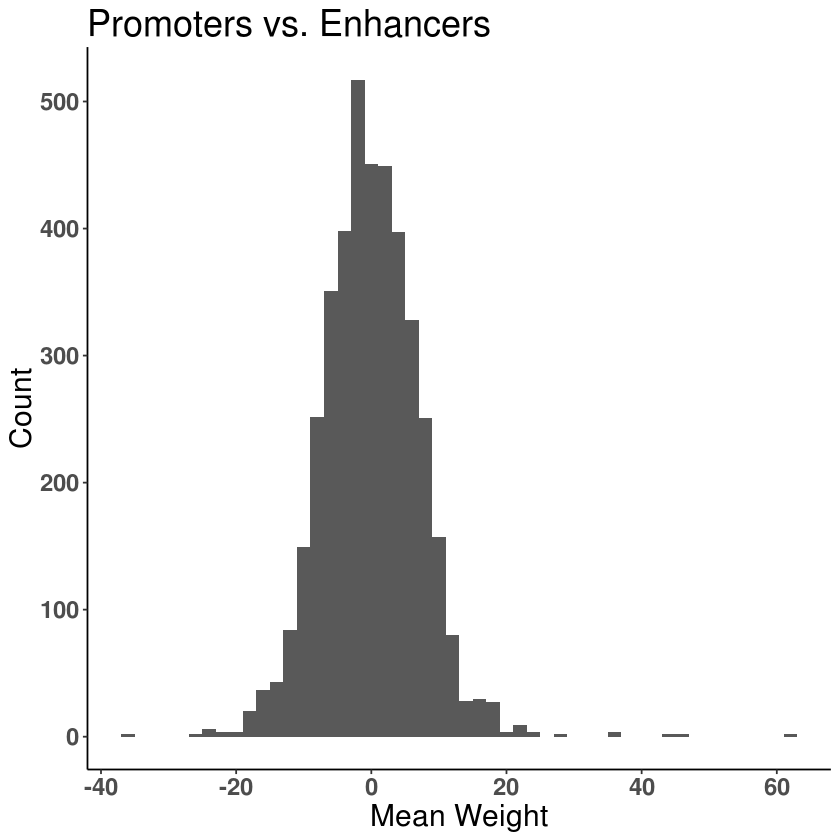

In [8]:
ggplot(promoter_pos,aes(mean_w)) + geom_histogram(binwidth=2) + theme_classic() +
  labs(x= "Mean Weight",y="Count",title = "Promoters vs. Enhancers") +
  theme(text = element_text(size=18),axis.text.x = element_text(face = "bold"),axis.text.y = element_text(face = "bold"))
ggsave("../prom_pos_weight_dist.pdf",width = 6, height = 5,units="in")

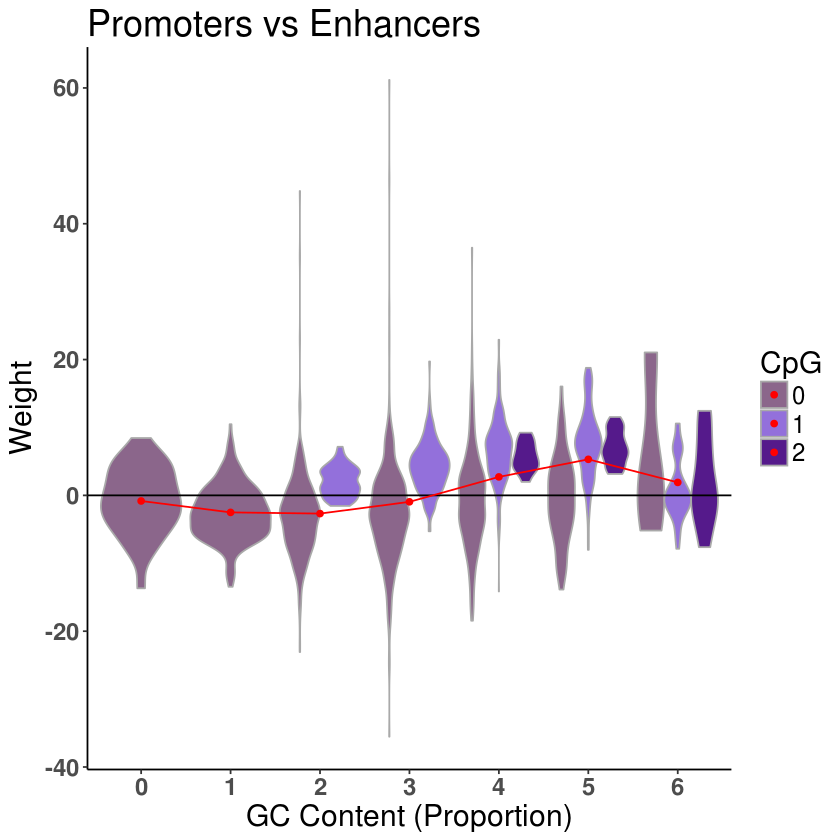

In [54]:
cols = c("plum4","mediumpurple","purple4")

promoter_pos$CpG <- as.factor(promoter_pos$CpG)
promoter_pos$GC <- as.factor(promoter_pos$GC)
line_plot <- data.frame(x = as.factor(unique(promoter_pos$GC)))
line_plot$CpG <- as.factor(0)
for (i in 1:nrow(line_plot)) {
  line_plot$y[i] <- mean(promoter_pos[promoter_pos$GC == line_plot$x[i],]$mean_w)}
ggplot(promoter_pos,aes(x=GC,y=mean_w,fill=CpG)) + geom_violin(color="darkgrey",scale = "width") +
b  geom_hline(yintercept=0,color = "black") + scale_fill_manual(values=cols) + theme_classic() +
  labs(x="GC Content (Proportion)",y="Weight",title = "Promoters vs Enhancers") +
  theme(text = element_text(size=18),axis.text.x = element_text(face = "bold"),axis.text.y = element_text(face = "bold")) + #ylim(-40,40) + 
  geom_line(data = line_plot, aes(x= x, y = y,group=1),color="red") + geom_point(data = line_plot, aes(x= x, y = y,group=1),color="red")

ggsave("../prom_pos.pdf",width = 6, height = 5,units="in")

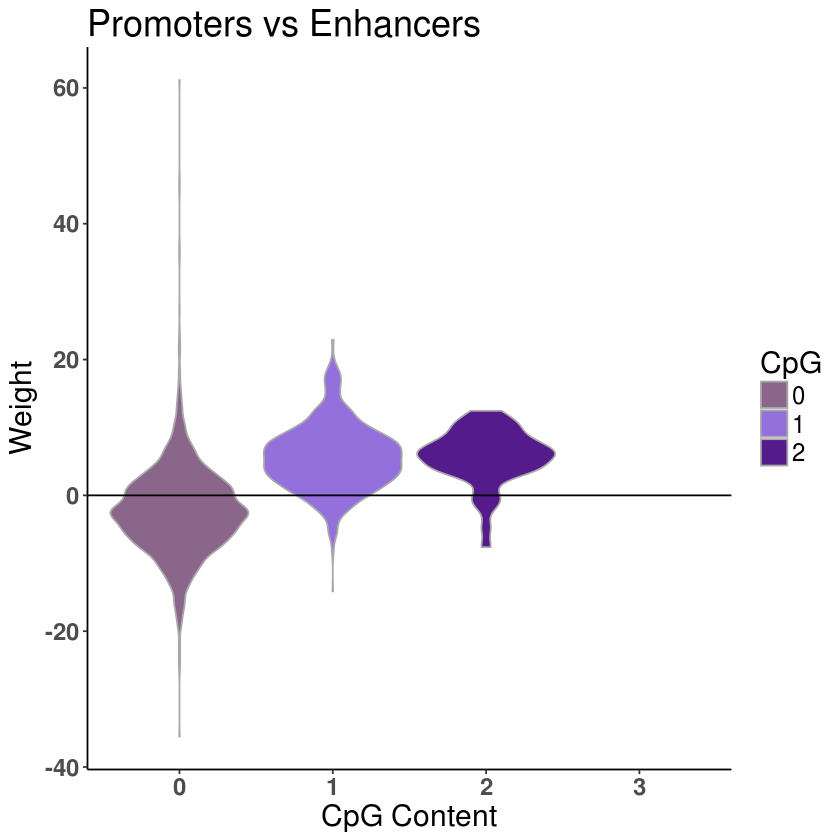

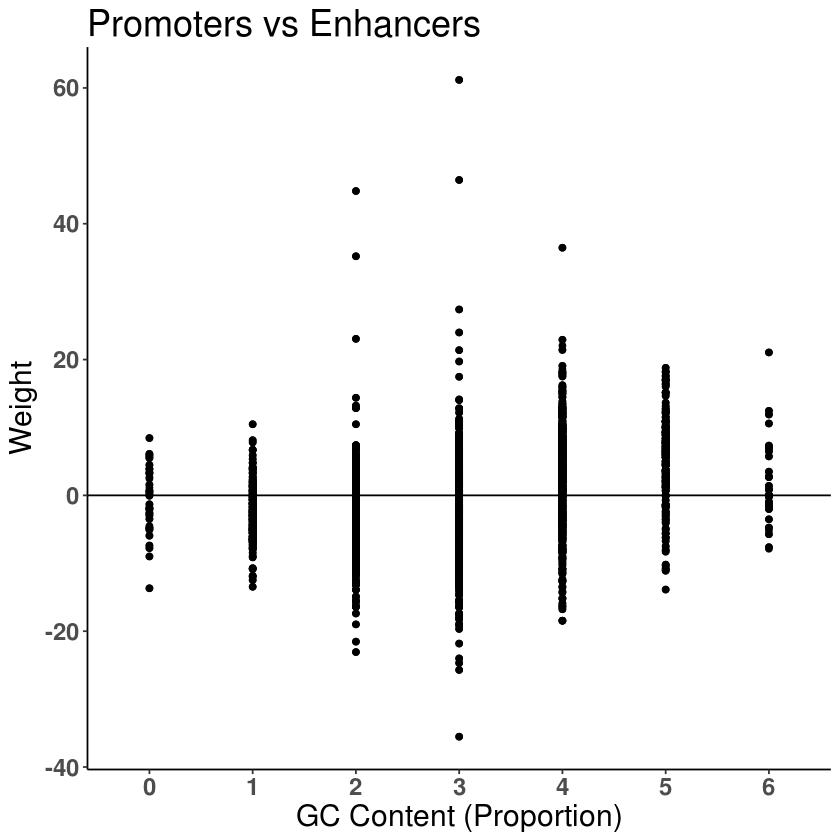

In [12]:
cols = c("plum4","mediumpurple","purple4")

promoter_pos$CpG <- as.factor(promoter_pos$CpG)
promoter_pos$GC <- as.factor(promoter_pos$GC)
ggplot(promoter_pos,aes(x=CpG,y=mean_w,fill=CpG)) + geom_violin(color="darkgrey",scale = "width") +
  geom_hline(yintercept=0,color = "black") + scale_fill_manual(values=cols) + theme_classic() +
  labs(x="CpG Content",y="Weight",title = "Promoters vs Enhancers") +
  theme(text = element_text(size=18),axis.text.x = element_text(face = "bold"),axis.text.y = element_text(face = "bold"))
ggsave("../prom_pos_cpg.pdf",width = 6, height = 5,units="in")
ggplot(promoter_pos,aes(x=GC,y=mean_w)) + geom_violin(color="darkgrey",scale = "width") +
  geom_hline(yintercept=0,color = "black") + scale_fill_manual(values=cols) + theme_classic() +
  labs(x="GC Content (Proportion)",y="Weight",title = "Promoters vs Enhancers") +
  theme(text = element_text(size=18),axis.text.x = element_text(face = "bold"),axis.text.y = element_text(face = "bold"))
ggsave("../prom_pos_gc.pdf",width = 6, height = 5,units="in")

***
[Contents](#Contents)

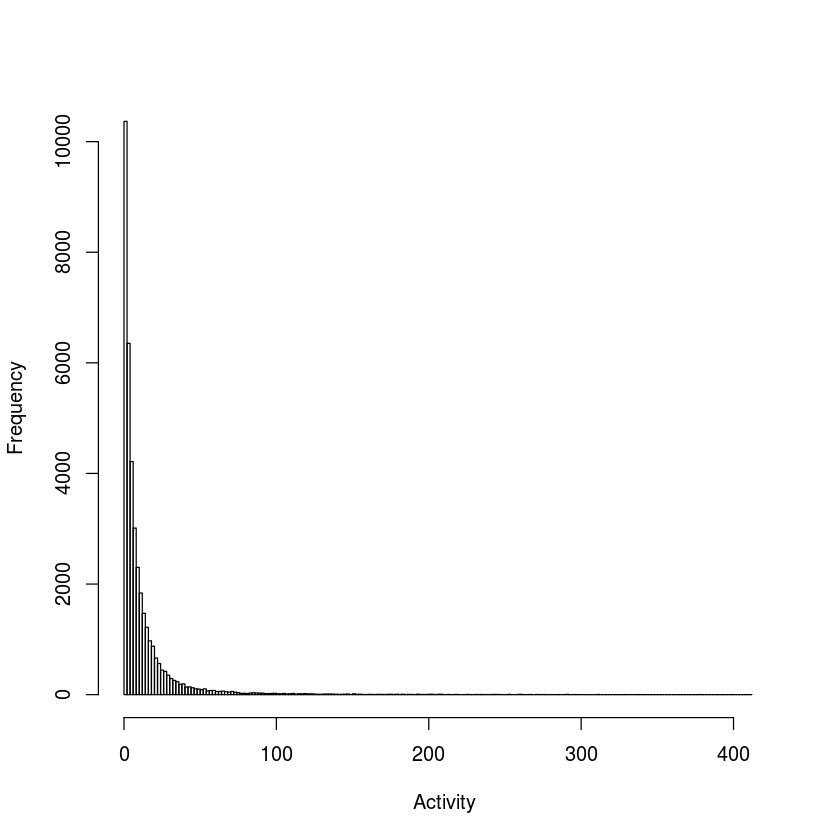

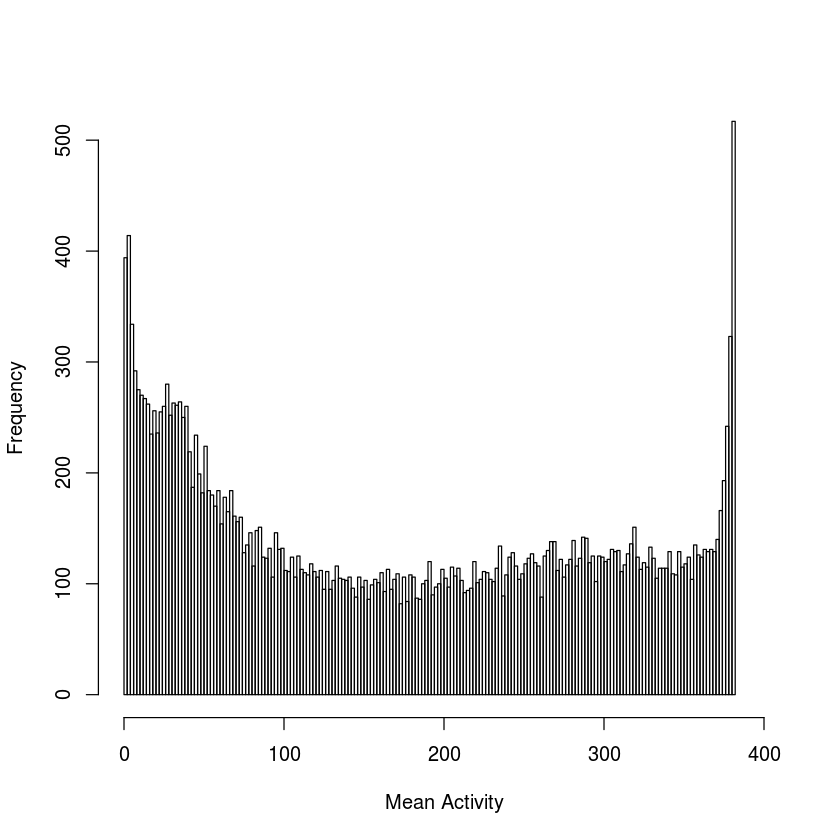

In [17]:
enh <- read.table("data/all_fantom_enhancers.bed",header=FALSE,stringsAsFactors = FALSE)
prom <- read.table("all_fantom_prom.bed",header=F,stringsAsFactors = FALSE)

hist(enh$V4,breaks=200,xlab="Activity",main=NULL,xlim=c(0,420))
hist(prom$V11,breaks=200,xlab="Mean Activity",main=NULL,xlim=c(0,400))

***
[Contents](#Contents)